#  Part III - NLP and Advanced Modeling

This is the third and final notebook of the capstone project. It contains advanced modeling of the dummy_df.csv dataset from the second notebook ("Part_Two_LinkedIn_Advanced_EDA_and_Modeling"). The data has been trained with Random forest and XGBoost Regressor with hyperparameter tuning and cross validation. The models has evaluated by their Mean Absolute Percentage Error and R2 values. The limitations of these models has also been discussed.

**Author: JJ Park**

**Date: 15/04/2024**  

### Dataset

Dataset has been sourced from: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data. 

<a id= 'table' ></a>
### Table of Contents

1. [Data Dictionary](#Dictionary)  
2. [Data Loading](#Load)
3. [Text Analysis - NLP](#Text)
4. [Modeling - Random Forest Regressor](#Random)
5. [Modeling - XG Boost](#XG)
6. [Evaluation Metrics](#Eval)
7. [Summary](#Summary)

<a id = 'Dictionary'><a/>   
## Data Dictionary
    
---

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

<a id = 'Load'><a/>   
## Data Loading
    
---

First, let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
# Read in the cleaned data from previous notebook
df = pd.read_csv('../Data/preprocessed_linkedin_job_posting.csv')
df.head()

,job_id,company_id,title,description,med_salary,pay_period,formatted_work_type,applies,remote_allowed,views,formatted_experience_level,sponsored,reposted,skills_present,application_portal,application_method,is_usa,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5250.00,MONTHLY,Full-time,5.0,0.0,9.0,Entry level,0,0,0,1,0,1,2023,11,4,5,26,40,2023,12,4,3,53,20,2023,11,4,5,26,40
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,73028.00,Not Specified,Full-time,5.0,0.0,16.0,Not Specified,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,73028.00,Not Specified,Full-time,5.0,0.0,16.0,Not Specified,0,0,1,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,22.27,HOURLY,Full-time,5.0,0.0,1.0,Entry level,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",240895.00,YEARLY,Full-time,5.0,1.0,16.0,Mid-Senior level,0,1,0,1,0,1,2023,11,2,20,6,40,2023,12,4,3,53,20,2023,11,4,5,26,40


In [4]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   applies                     33246 non-null  float64
 8   remote_allowed              33246 non-null  float64
 9   views                       33246 non-null  float64
 10  formatted_experience_level  33246 non-null  object 
 11  sponsored                   33246 non-null  int64  
 12  reposted                    33246 non-null  int64  
 13  skills_present              332

The preprocessed data has been sucessfully loaded. Let's create dummy variables for the remaining categorical variables (excluding title and description as we will be conducting text analysis with these two columns).

In [5]:
# Creating dummy variables
dummy_variables = pd.get_dummies(df[['pay_period', 'formatted_work_type', 'formatted_experience_level']])

# Concatenating the dummy variables with the original DataFrame
df_dummies = pd.concat([df, dummy_variables], axis=1)

# Drop the original columns to avoid redundancy
df_dummies = df_dummies.drop(['pay_period', 'formatted_work_type', 'formatted_experience_level'], axis=1)

In [6]:
df_dummies.head()

,job_id,company_id,title,description,med_salary,applies,remote_allowed,views,sponsored,reposted,skills_present,application_portal,application_method,is_usa,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second,pay_period_HOURLY,pay_period_MONTHLY,pay_period_Not Specified,pay_period_ONCE,pay_period_WEEKLY,pay_period_YEARLY,formatted_work_type_Contract,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,formatted_experience_level_Associate,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level,formatted_experience_level_Not Specified
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5250.00,5.0,0.0,9.0,0,0,0,1,0,1,2023,11,4,5,26,40,2023,12,4,3,53,20,2023,11,4,5,26,40,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,73028.00,5.0,0.0,16.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,73028.00,5.0,0.0,16.0,0,0,1,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,22.27,5.0,0.0,1.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",240895.00,5.0,1.0,16.0,0,1,0,1,0,1,2023,11,2,20,6,40,2023,12,4,3,53,20,2023,11,4,5,26,40,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
# Sanity Check
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   job_id                                       33246 non-null  int64  
 1   company_id                                   33246 non-null  float64
 2   title                                        33246 non-null  object 
 3   description                                  33246 non-null  object 
 4   med_salary                                   33246 non-null  float64
 5   applies                                      33246 non-null  float64
 6   remote_allowed                               33246 non-null  float64
 7   views                                        33246 non-null  float64
 8   sponsored                                    33246 non-null  int64  
 9   reposted                                     33246 non-null  int64  
 10

All the categorical values have been converted into dummies. We are left with `title` and `description` columns. Let's conduct text analysis on the two remaining columns and draw insights about the text data.

<a id = 'Text'><a/>   
## Text Analysis - NLP
    
---

We will be using SKlearn to extract word data:

1. Split the data into train and test sets
2. Fit and transform data with CountVectorizer with `max_features` of 500 tokens and ensure that tokens used <10 times are dropped from the vocabulary.
3. Clean the tokens by first viewing the common words in each model

In [8]:
# slice out target variable and independant variables
X = df_dummies.drop('views', axis = 1)
y = df_dummies['views']

In [9]:
from sklearn.model_selection import train_test_split

# 30% test size and 70% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [10]:
# Can use .shape to look at size of training data
X_train.shape

(23272, 51)

In [11]:
# Slice out title and description train and test reviews
title_X_train = X_train['title']
desc_X_train = X_train['description']

title_X_test = X_test['title']
desc_X_test = X_test['description']

Now that we splitted the data and sliced out the variables, we can apply the CountVectorizer() and ensure the max number of tokens is 500 with `max_features`.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer
title_bow = CountVectorizer(max_features=500, min_df = 10)
desc_bow = CountVectorizer(max_features=500, min_df = 10)

# fit the model to training set
title_bow.fit(title_X_train)
desc_bow.fit(desc_X_train)

# transform the training set
title_train_transform = title_bow.transform(title_X_train)
desc_train_transform = desc_bow.transform(desc_X_train)

# transform the test set
title_test_transform = title_bow.transform(title_X_test)
desc_test_transform = desc_bow.transform(desc_X_test)

In [13]:
title_train_transform

<23272x500 sparse matrix of type '<class 'numpy.int64'>'
	with 68365 stored elements in Compressed Sparse Row format>

The training: title sparse matrix contains 23272 rows and 500 columns.

In [14]:
desc_train_transform

<23272x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3112548 stored elements in Compressed Sparse Row format>

The training: description sparse matrix contains 23272 rows and 500 columns.

Let's take a look at the most frequently used words in both the title and description train posts.

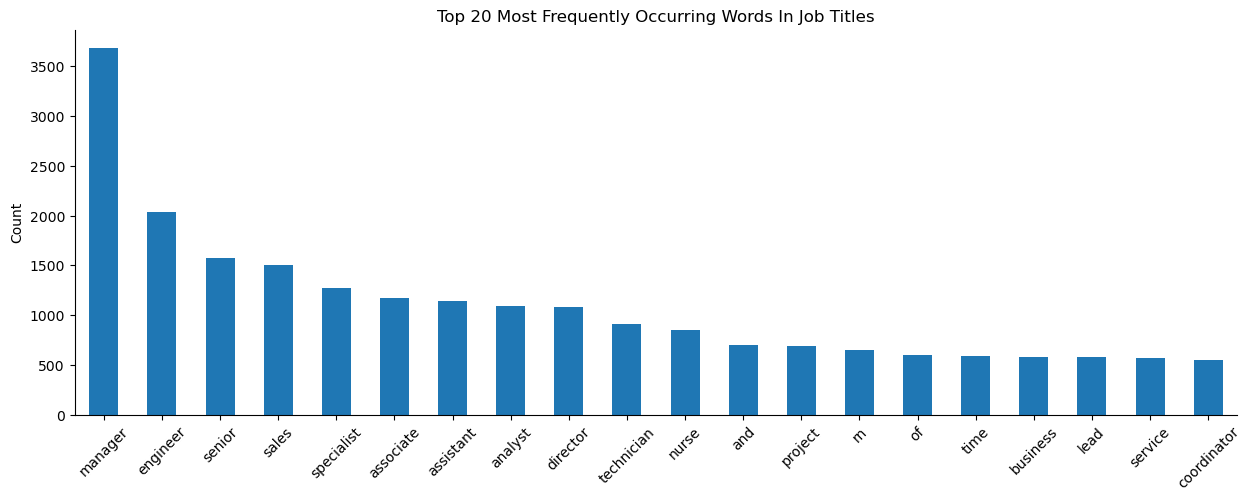

In [15]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=title_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Titles".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

We can observe that the words, `manager`, `engineer`, `senior`, and `sales` appear the most. These words are quite powerful as they describe specific job fields, level of experience, and positions. There are some stop words like `of` and `and` that do not add much value to our model, hence we will deal with them accordingly. Let's take a look at the top 20 occurring words in the job descriptions.

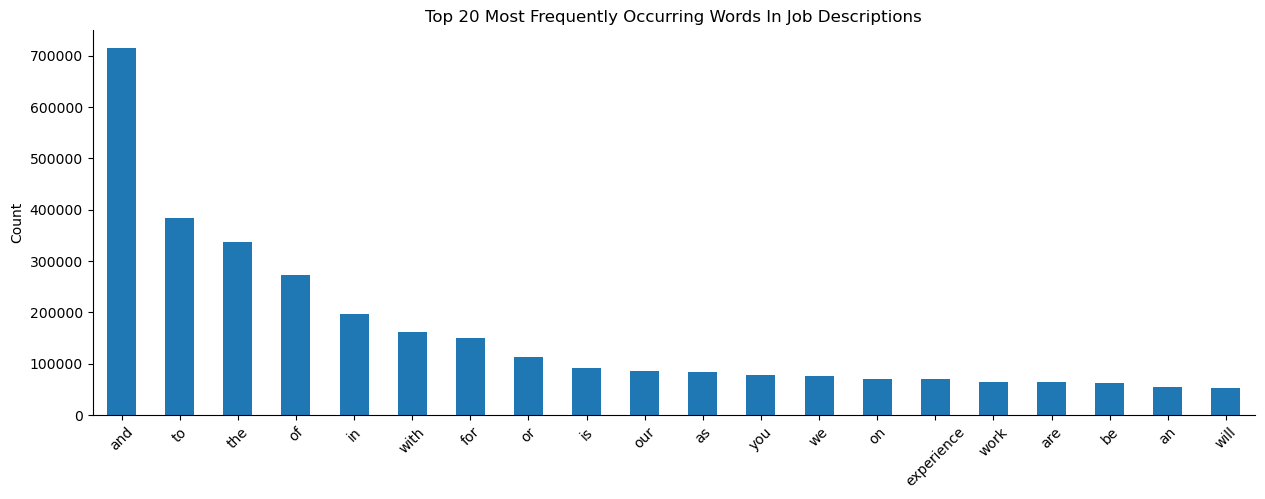

In [16]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": desc_train_transform.toarray().sum(axis=0)},
    index=desc_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Descriptions".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

Unlike job titles, job descriptions are dominated with stop words, such as `and`, `to`, and `the`. Let's remove all these stop words to have a better picture of the popular words in job description section.

Here, stop_words='english' command removes the most common stop words in the english language according to scikit-learn.

In [17]:
# instantiate CountVectorizer and add stop words
title_bow = CountVectorizer(stop_words='english', max_features=500, min_df = 10)
desc_bow = CountVectorizer(stop_words='english', max_features=500, min_df = 10)

# fit the model to training set
title_bow.fit(title_X_train)
desc_bow.fit(desc_X_train)

# transform the training set
title_train_transform = title_bow.transform(title_X_train)
desc_train_transform = desc_bow.transform(desc_X_train)

# transform the test set
title_test_transform = title_bow.transform(title_X_test)
desc_test_transform = desc_bow.transform(desc_X_test)

Let's look at the most common job title and description words.

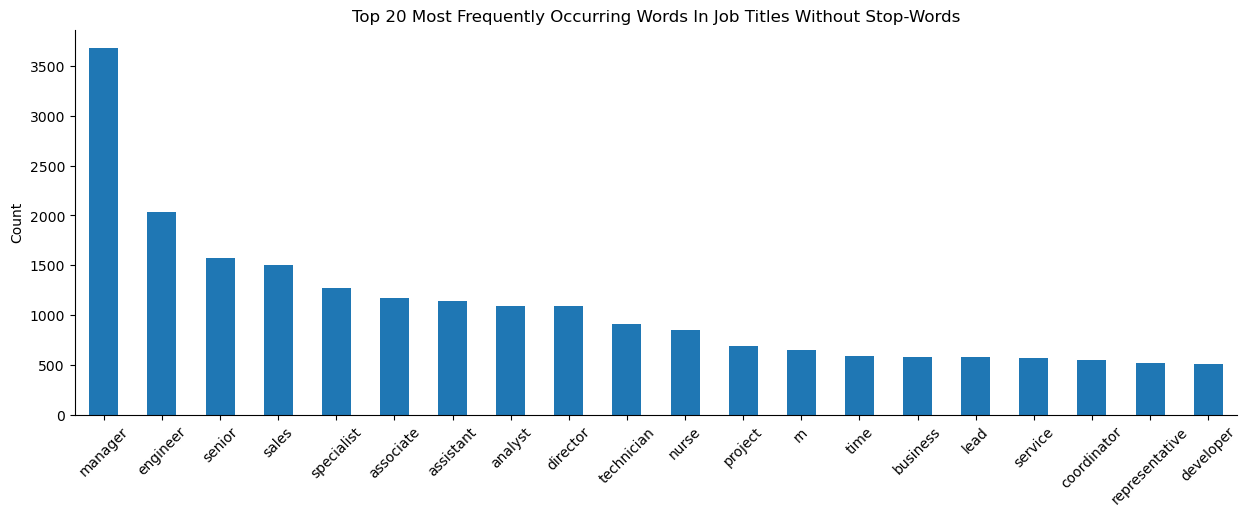

In [18]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=title_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Titles Without Stop-Words".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

We can observe that there wasn't a big change in top 20 most used words in job title section after eliminating the stop words. Let's take a look at the top 20 most occurring words in job description.

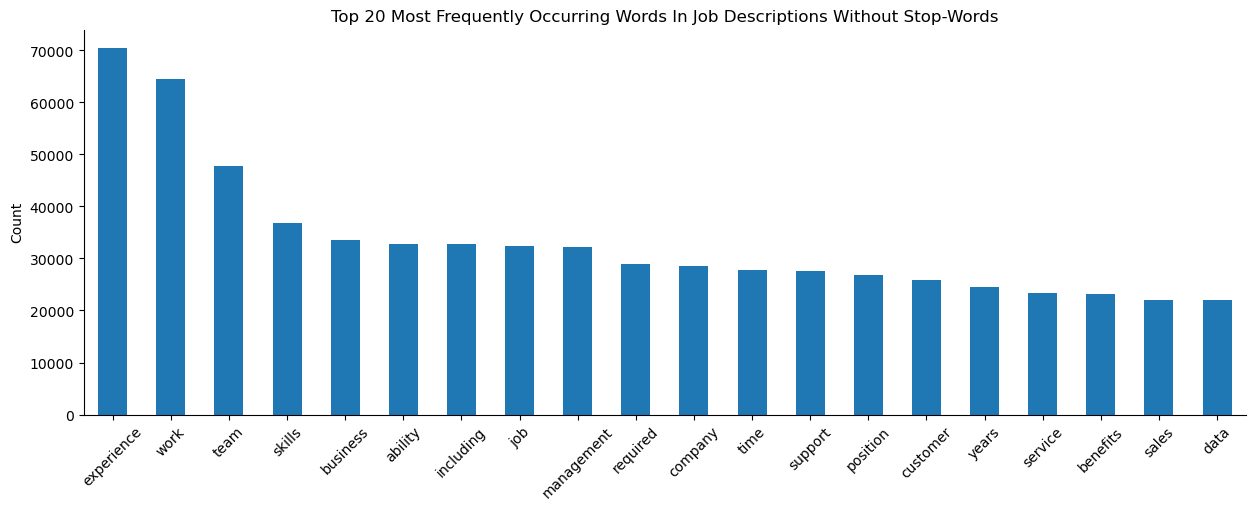

In [19]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": desc_train_transform.toarray().sum(axis=0)},
    index=desc_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Descriptions without Stop-Words".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

This is a great improvement from the first run as the words like `experience`, `work`, `team`, and more specific words have started to appear. However, compared to popular words from job title, these words are somewhat generic and do not provide any further information to reveal job industry, job level and alike. Hence, let's adopt N-grams which group sequential words together. 

ngram_range = (1, 2) will allow the model to have both unigrams and bigrams in the model.

In [20]:
# instantiate CountVectorizer and add ngram_range
title_bow = CountVectorizer(stop_words='english', max_features=500, min_df = 10, ngram_range = (1,2)) # Using unigrams and bigrams in the model
desc_bow = CountVectorizer(stop_words='english', max_features=500, min_df = 10, ngram_range = (1,2))

# fit the model to training set
title_bow.fit(title_X_train)
desc_bow.fit(desc_X_train)

# transform the training set
title_train_transform = title_bow.transform(title_X_train)
desc_train_transform = desc_bow.transform(desc_X_train)

# transform the test set
title_test_transform = title_bow.transform(title_X_test)
desc_test_transform = desc_bow.transform(desc_X_test)

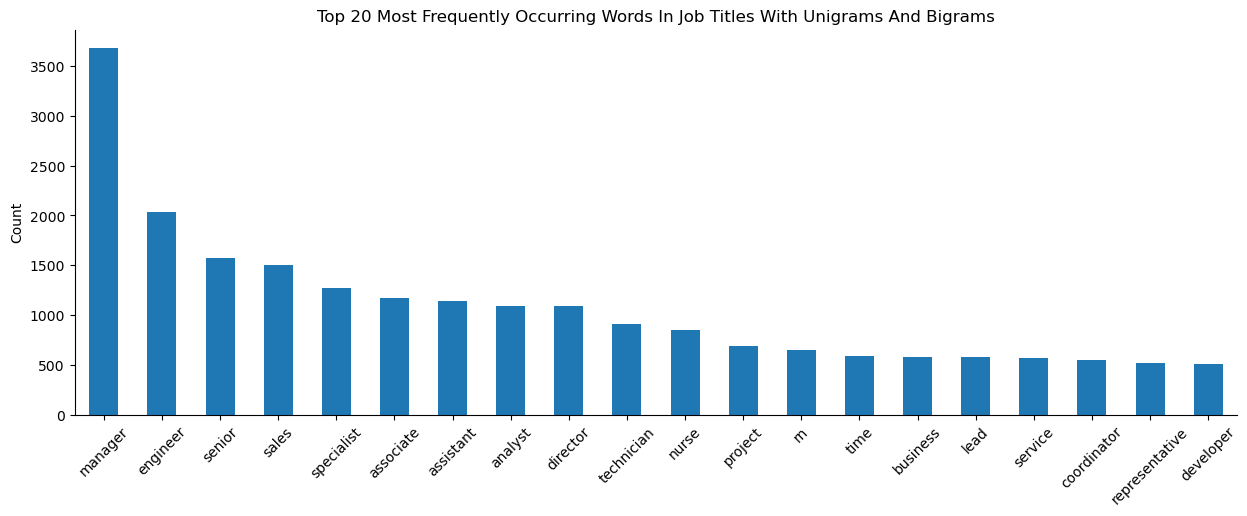

In [21]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=title_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Titles With Unigrams and Bigrams".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

There were no changes made from removing stop words. Let's take a look at job descriptions.

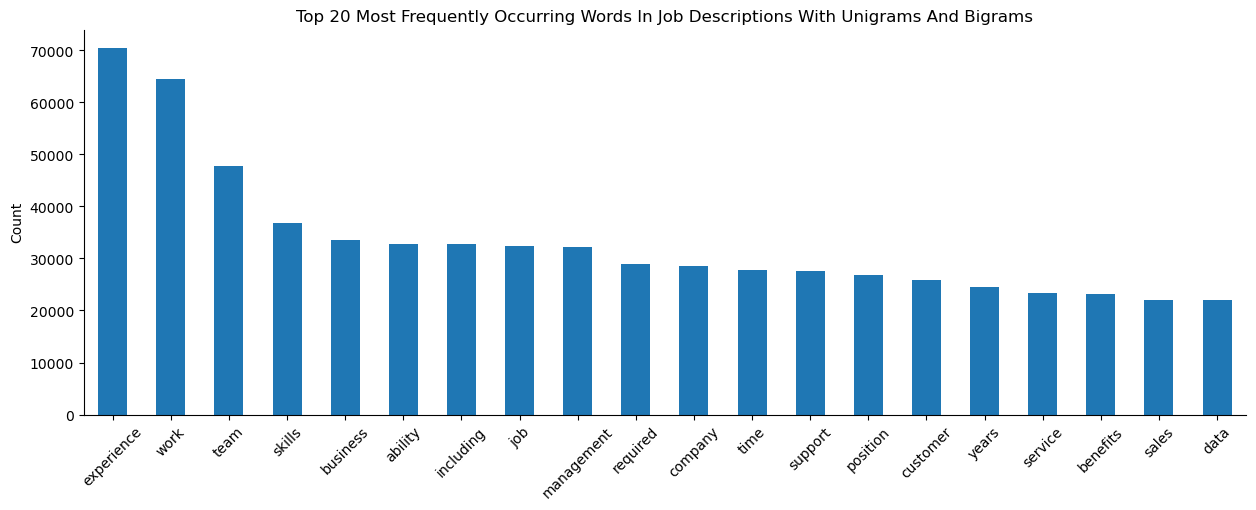

In [22]:
# we can sum up the words in an array and store it in DataFrame()
word_counts = pd.DataFrame(
    {"counts": desc_train_transform.toarray().sum(axis=0)},
    index=desc_bow.get_feature_names_out()
).sort_values("counts", ascending=False)

#head(20) looks at the top 20 words when ascending=False
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("Top 20 most frequently occurring words in Job Descriptions with Unigrams and Bigrams".title())
plt.ylabel("Count")
plt.xticks(rotation=45) # this rotates the xlabels to make them easier to read

sns.despine()
plt.show()

There were no changes made to the job descriptions as well. The popular words in the job description are relatively vague compared to job title, hence we will proceed with just the title column for modeling.

Let's concatenate the sparse matrices back into the dataset and prepare for modeling

1. We need to label the job title words (Using the prefix 'title_')
2. Convert the sparse matrix into pandas dataframe
3. Concatenate dataframe to main dataset

In [23]:
# Add prefix title_ to the title columns
title_col_name = ['title_' + word for word in title_bow.get_feature_names_out()]

In [24]:
# convert job title sparse matrix into dataframes
# Source(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html)
title_df = pd.DataFrame.sparse.from_spmatrix(title_train_transform, columns = title_col_name).sparse.to_dense()

In [25]:
# sanity check
print(title_df.shape)

(23272, 500)


print(title_df.value_counts(ascending=False))

Now we just need to concatenate the two dataframes back into the X_train set. First, we need to reset our index, then combine it to the main dataset.

In [27]:
# Resetting indexes
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
title_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
new_X_train = pd.concat([X_train, title_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_train.drop(columns = ['title','description'], inplace=True)
new_X_train.head()

,job_id,company_id,med_salary,applies,remote_allowed,sponsored,reposted,skills_present,application_portal,application_method,is_usa,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second,pay_period_HOURLY,pay_period_MONTHLY,pay_period_Not Specified,pay_period_ONCE,pay_period_WEEKLY,pay_period_YEARLY,formatted_work_type_Contract,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,formatted_experience_level_Associate,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level,formatted_experience_level_Not Specified,title_000,...,title_tax,title_tax manager,title_teacher,title_team,title_team lead,title_team member,title_tech,title_technical,title_technical support,title_technician,title_technologist,title_technology,title_tele,title_telemetry,title_temporary,title_territory,title_territory manager,title_test,title_test engineer,title_therapist,title_time,title_trainee,title_training,title_transportation,title_travel,title_travel nurse,title_travel registered,title_truck,title_truck driver,title_tx,title_ui,title_unit,title_usa,title_utility,title_va,title_veterinary,title_vice,title_vice president,title_virtual,title_visual,title_vp,title_w2,title_warehouse,title_warehouse associate,title_web,title_week,title_west,title_wk,title_worker,title_writer
0,3700555206,6476.0,73028.0,5.0,0.0,0,1,0,1,0,1,2023,8,20,21,6,40,2023,9,21,3,6,40,2023,8,22,0,53,20,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3699047159,13637042.0,55.0,6.0,0.0,0,0,0,0,1,1,2023,8,23,18,33,20,2024,2,19,17,0,0,2023,8,23,18,33,20,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3757444881,155764.0,73028.0,3.0,0.0,0,0,0,0,1,1,2023,11,3,15,33,20,2023,12,3,14,0,0,2023,11,3,15,33,20,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3756112301,6979.0,73028.0,5.0,0.0,0,1,0,1,0,1,2023,11,2,20,6,40,2023,12,3,19,33,20,2023,11,3,18,20,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3755589412,6646428.0,23.0,5.0,0.0,1,0,0,0,1,1,2023,11,3,18,20,0,2023,12,3,16,46,40,2023,11,3,18,20,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
new_X_train.shape

(23272, 549)

In [83]:
# Save the DataFrame to a CSV file in the 'Data' folder
new_X_train.to_csv("../Data/trained_data.csv", index=False)

In [76]:
y_train.shape

(23272,)

The number of rows (23,272) and columns are correct (columns = 500 + 49).

We have to repeat the same steps for combining the testing set.

In [29]:
# convert pos and neg testing sparse matrix into dataframes
# Source(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html)
title_test_df = pd.DataFrame.sparse.from_spmatrix(title_test_transform, columns = title_col_name).sparse.to_dense()

In [30]:
# Resetting indexes
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
title_test_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
new_X_test = pd.concat([X_test, title_test_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_test.drop(columns = ['title','description'], inplace=True)

In [75]:
new_X_test.shape

(9974, 549)

In [77]:
y_test.shape

(9974,)

Now that the text data has been preprocessed and added back into the X_train dataframe, we can begin modeling.

<a id = 'Random'><a/>   
## Random Forest
    
---

Let's begin by importing all the necessary libraries

In [31]:
# import libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint,uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

Below, we have created a baseline random forest regressor:

In [32]:
# Creating the model
model = RandomForestRegressor()

# Training the model on the training data
model.fit(new_X_train, y_train)

# Making predictions on the testing set
y_pred_test = model.predict(new_X_test)

# Making predictions on the training set
y_pred_train = model.predict(new_X_train)

# Calculating MAE for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE) for TRAIN set: {mae_train}")

# Calculating MAE for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) for TEST set: {mae_test}")

# Calculating R-squared
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared (R^2) value TRAIN: {r2}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value TEST: {r2}")

Mean Absolute Error (MAE) for TRAIN set: 7.179943713856944
Mean Absolute Error (MAE) for TEST set: 18.973795549845576
R-squared (R^2) value TRAIN: 0.9636070151548589
R-squared (R^2) value TEST: 0.7684885237443131


The discrepancies between the train and test sets for both MAE and R-squared are quite high and both scores indicate that the data is overfitted. Therefore, we will apply some advanced modeling techniques such as hyperparameter tuning and cross validation to improve the evaluation metrics and deal with overfitting issues.

### Grid Search

Let's conduct a grid search with simple hyperparameter tuning. For estimators, having more trees often lead to better performance so we have set the range from 50 to 100. For max depth, a shallower tree reduces model complexity, which might help in reducing overfitting. Hence we've set the range from 10 to 20. We have splitted the data at 2 and 5, since lower value makes the tree more sensitive to noise but may capture more detailed patterns. Lastly, setting min_samples_leaf as 1 and 2 helps to control the sensitivity of the model to noise.

In [33]:
# Define the model (This step is redundant here and included for clarity)
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,
                           scoring='neg_mean_absolute_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(new_X_train, y_train)

# Extract the best estimator
best_rf = grid_search.best_estimator_

# Making predictions with the best model on both train and test sets
y_pred_train = best_rf.predict(new_X_train)
y_pred_test = best_rf.predict(new_X_test)

# Calculating MAE for both training and testing sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculating R-squared for both training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Printing the results
print(f"Mean Absolute Error (MAE) for TRAIN set: {mae_train}")
print(f"Mean Absolute Error (MAE) for TEST set: {mae_test}")
print(f"R-squared (R^2) value TRAIN: {r2_train}")
print(f"R-squared (R^2) value TEST: {r2_test}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.5s
[CV] END max_depth=10, min_samples_l

Let's determine the best hyperparameters from the grid search and evaluate the model using MAE and R-squared values.

In [34]:
# Accessing the best hyperparameters
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [35]:
# Creating the model
model = RandomForestRegressor(n_estimators=100,
                    max_depth=20,
                    min_samples_split=5,
                    min_samples_leaf=2)

# Training the model on the training data
model.fit(new_X_train, y_train)

# Making predictions on the testing set
y_pred_test = model.predict(new_X_test)

# Making predictions on the training set
y_pred_train = model.predict(new_X_train)

# Calculating R-squared
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared (R^2) value: {r2}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value: {r2}")

# Calculating MAE for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE) for TRAIN set: {mae_train}")

# Calculating MAE for test set
mae_test =mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) for TEST set: {mae_test}")

# Creating a DataFrame with actual and predicted values for the training set
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})

# Creating a DataFrame with actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

R-squared (R^2) value: 0.9108431359656884
R-squared (R^2) value: 0.7690874886340305
Mean Absolute Error (MAE) for TRAIN set: 12.481647916912875
Mean Absolute Error (MAE) for TEST set: 19.477425011213697


The random forest regressor model with simple hyperparameter tuning has minimized the discrepancies between train and test sets, reducing the overfit within the data. However, more work needs to be done to improve the MAE and R-squared values, as well as minimizing the discrepancies between train and test sets.

Let's explore further to improve the MAE and R-squared values by adjusting the hyperparameters to find better evaluation scores.

In [36]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.9046983010853418
r2 test=  0.7690782910953576
mae train=  13.917609977762114
mae test=  19.686991679931563


In [37]:
rf = RandomForestRegressor(n_estimators=100, max_depth=25, min_samples_split=5, min_samples_leaf=2)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.9126314444561571
r2 test=  0.7745300814753591
mae train=  11.67851379066621
mae test=  19.278006737068452


In [38]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=5)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.847000322818323
r2 test=  0.7705153847387242
mae train=  15.5487445875016
mae test=  19.624279014246014


In [39]:
rf = RandomForestRegressor(n_estimators=150, max_depth=15, min_samples_split=10, min_samples_leaf=5)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.8473301205203803
r2 test=  0.770421479022513
mae train=  15.500662156532025
mae test=  19.550243978158065


In [40]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=15, min_samples_leaf=5)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.8237796149138743
r2 test=  0.7650540963228907
mae train=  17.698593877805724
mae test=  20.06830650202389


In [41]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=15, min_samples_leaf=6)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.8164768573830765
r2 test=  0.7658270638831096
mae train=  17.75219696454259
mae test=  20.041845538142862


In [42]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=15, min_samples_leaf=10)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.7950108764814225
r2 test=  0.7689530455339467
mae train=  18.2089690886512
mae test=  19.997921353320702


The MAE and R-squared values seem to be optimal when the hyperparameters are set at:
- n_estimators = 100
- max_depth = 10
- min_samples_split = 15
- min_samples_leaf = 10

Let's conduct further analysis by looking at each of the hyperparameter to find the best range that optimizes the MAE and R-squared values.

### n_estimators

Let's first take a look at `n_estimators`. We will set the n_estimators value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

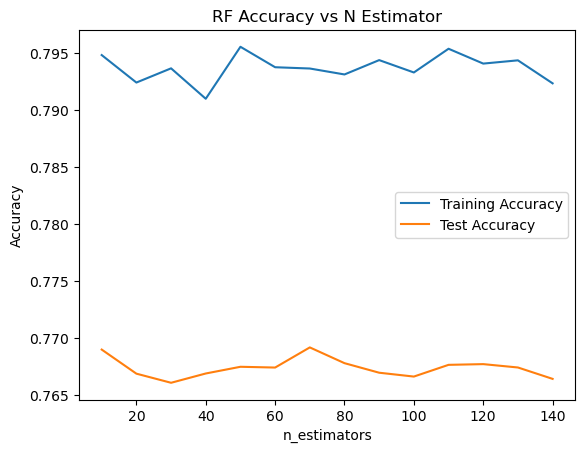

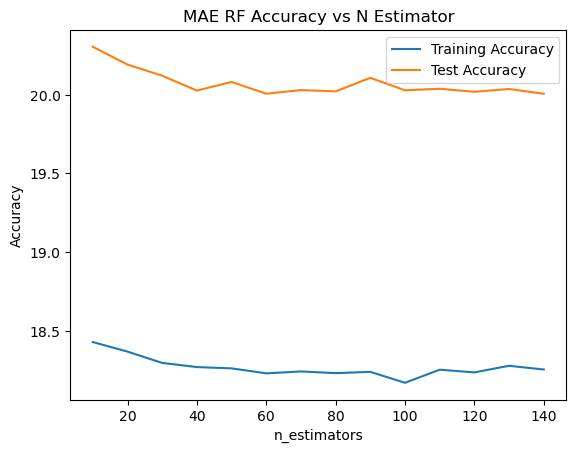

In [43]:
n_est = range(10,150,10)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in n_est:
    rf = RandomForestRegressor(n_estimators=est, max_depth=10, min_samples_split=15, min_samples_leaf=10)
    rf.fit(new_X_train, y_train)   
    train_acc.append(rf.score(new_X_train, y_train))
    test_acc.append(rf.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, rf.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, rf.predict(new_X_test)))


plt.plot(n_est, train_acc, label='Training Accuracy')
plt.plot(n_est, test_acc, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs N Estimator')
plt.legend()
plt.show()

plt.plot(n_est, mae_train, label='Training Accuracy')
plt.plot(n_est, mae_test, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('MAE RF Accuracy vs N Estimator')
plt.legend()
plt.show()

Let's take the n_estimators at 100.

### min_samples_split

Let's take a look at `min_samples_split`. We will set the min_sample_split value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

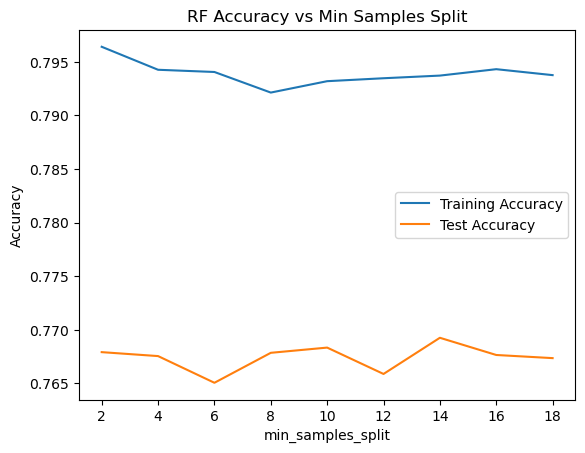

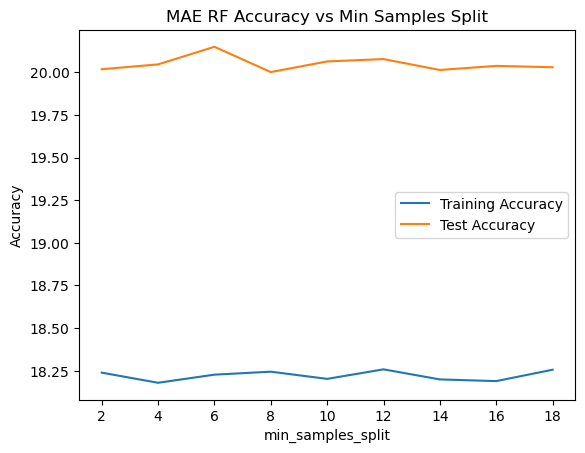

In [44]:
min_ss = range(2,20,2)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in min_ss:
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=est, min_samples_leaf=10)
    rf.fit(new_X_train, y_train)   
    train_acc.append(rf.score(new_X_train, y_train))
    test_acc.append(rf.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, rf.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, rf.predict(new_X_test)))


plt.plot(min_ss, train_acc, label='Training Accuracy')
plt.plot(min_ss, test_acc, label='Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs Min Samples Split')
plt.legend()
plt.show()

plt.plot(min_ss, mae_train, label='Training Accuracy')
plt.plot(min_ss, mae_test, label='Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('MAE RF Accuracy vs Min Samples Split')
plt.legend()
plt.show()

We will set the min_samples_split at 12.

### min_samples_leaf

Let's first take a look at `min_samples_leaf`. We will set the min_samples_leaf value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

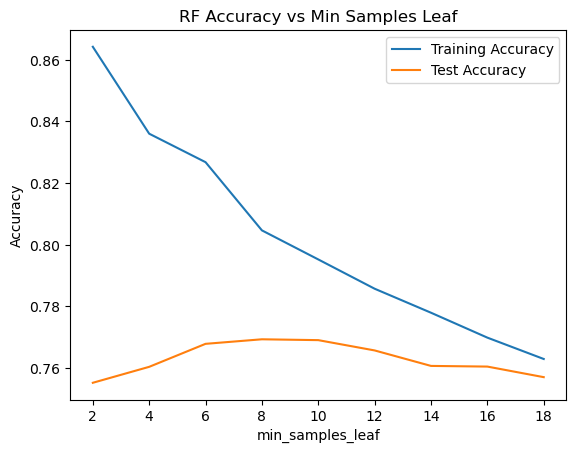

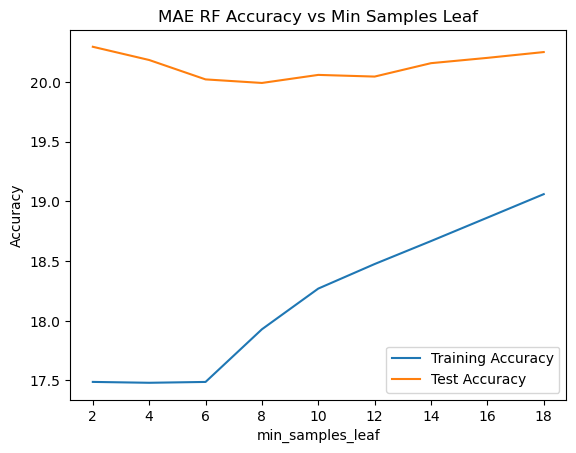

In [45]:
min_sl = range(2,20,2)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in min_sl:
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=12, min_samples_leaf=est)
    rf.fit(new_X_train, y_train)   
    train_acc.append(rf.score(new_X_train, y_train))
    test_acc.append(rf.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, rf.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, rf.predict(new_X_test)))


plt.plot(min_sl, train_acc, label='Training Accuracy')
plt.plot(min_sl, test_acc, label='Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs Min Samples Leaf')
plt.legend()
plt.show()

plt.plot(min_sl, mae_train, label='Training Accuracy')
plt.plot(min_sl, mae_test, label='Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('MAE RF Accuracy vs Min Samples Leaf')
plt.legend()
plt.show()

Let's take the min_samples_leaf value at 18.

### max_depth

Let's first take a look at `max_depth`. We will set the max_depth value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

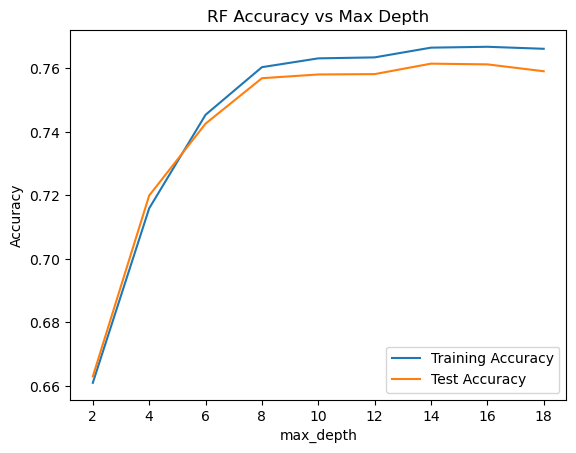

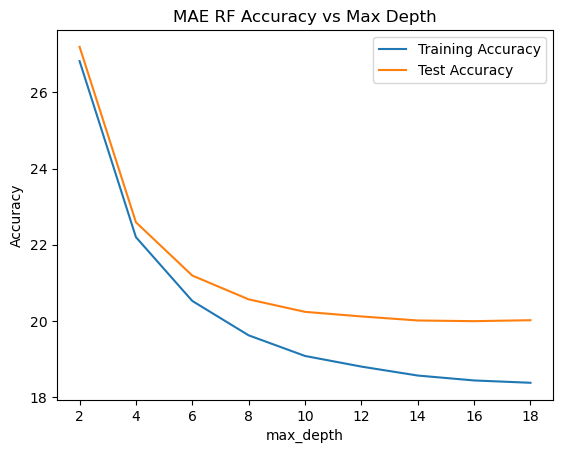

In [46]:
depth = range(2,20,2)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in depth:
    rf = RandomForestRegressor(n_estimators=100, max_depth=est, min_samples_split=12, min_samples_leaf=18)
    rf.fit(new_X_train, y_train)   
    train_acc.append(rf.score(new_X_train, y_train))
    test_acc.append(rf.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, rf.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, rf.predict(new_X_test)))


plt.plot(depth, train_acc, label='Training Accuracy')
plt.plot(depth, test_acc, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs Max Depth')
plt.legend()
plt.show()

plt.plot(depth, mae_train, label='Training Accuracy')
plt.plot(depth, mae_test, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('MAE RF Accuracy vs Max Depth')
plt.legend()
plt.show()

We will set the max_depth at 5. Now let's use the optimal hyperparameter values found from above to determine the ideal evaluation metrics for the train and test sets.

In [47]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=12, min_samples_leaf=18)
rf.fit(new_X_train, y_train)
print("r2 train= ",rf.score(new_X_train, y_train))
print("r2 test= ",rf.score(new_X_test, y_test))
from sklearn.metrics import mean_absolute_error
y_pred_train=rf.predict(new_X_train)
y_pred_test=rf.predict(new_X_test)
print("mae train= ",mean_absolute_error(y_train, rf.predict(new_X_train)))
print("mae test= ",mean_absolute_error(y_test, rf.predict(new_X_test)))

r2 train=  0.7305173021055622
r2 test=  0.7299193539693215
mae train=  21.352574345611952
mae test=  21.912925667311196


By setting all the hyperparameters to their optimal levels, we have our new train and test evaluation metrics. As we can see, there's barely any overfitting as the discrepancy between the train and test sets are very minimal (within 0.5). The R-squared values are relatively high, which is ideal, and the MAE values are relatively low (since the views column is ranging from 1 to 5600, the MAE values of 21-22 are relatively low), hence it is a good model.

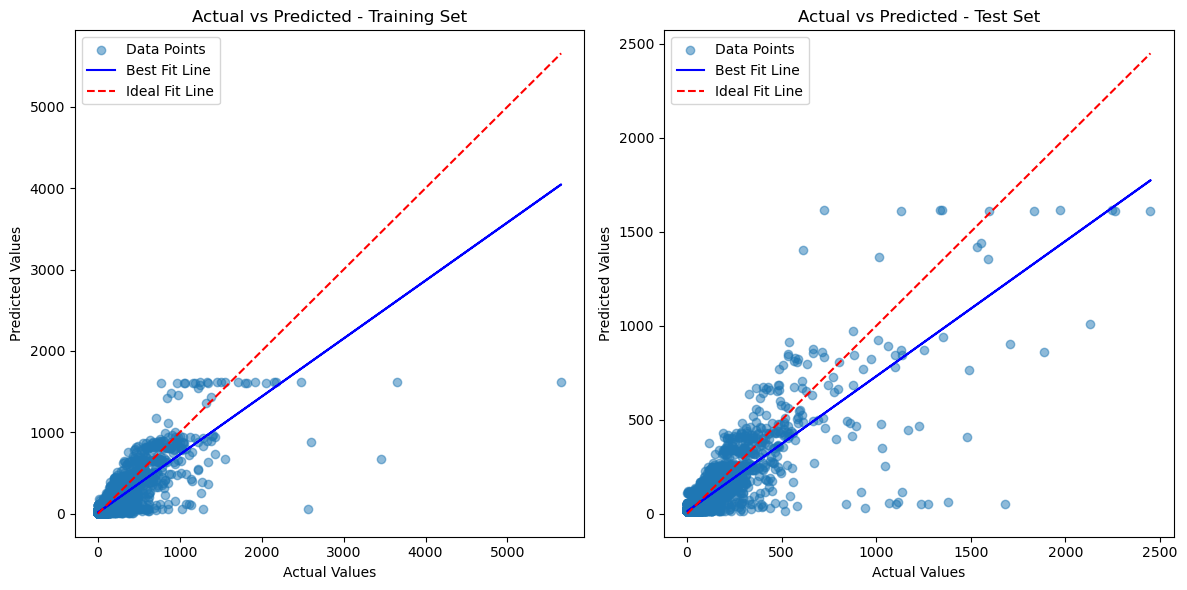

In [48]:
from sklearn.metrics import r2_score

# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train, y_pred_train, plt.gca(), 'Best Fit Line')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test, y_pred_test, plt.gca(), 'Best Fit Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

From the plots above, we can observe that there is still a significant discrepancy between the best fit and ideal fit lines. The data points tend to diverge from the ideal fit line as the actual values increase (approach to the right). Therefore, more extensive grid search with wider range of values and parameters is needed, but this can be time consuming. Let's try XGBoost next and compare the performance between the two models.

| Model                   | MAE (Train) | MAE (Test) | R-squared (Train) | R-squared (Test) |
|-------------------------|-------------|------------|-------------------|------------------|
| Random Forest           | 21.3375     | 21.8572    | 0.731324          | 0.731279         |

Let's save the random forest model as a pickle file for visualization and predictive modeling:

In [84]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Now save the model
with open('rf_model2.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [86]:
import pickle

# Load the model
with open('rf_model2.pkl', 'rb') as f:
    model = pickle.load(f)

# Check if the model is loaded correctly
print(type(model))  # This should output <class 'sklearn.ensemble._forest.RandomForestRegressor'>


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [74]:
# Train your Random Forest regression model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=12, min_samples_leaf=18)
rf.fit(new_X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance scores
for i in range(new_X_train.shape[1]):
    print(f"{i + 1}. Feature '{new_X_train.columns[indices[i]]}' importance: {importances[indices[i]]}")


1. Feature 'applies' importance: 0.9529195074993289
2. Feature 'application_method' importance: 0.0211704085131886
3. Feature 'remote_allowed' importance: 0.0075161861785137144
4. Feature 'job_id' importance: 0.006639099479917297
5. Feature 'company_id' importance: 0.002702522558864426
6. Feature 'expiry_month' importance: 0.0018638515721661445
7. Feature 'original_listed_day' importance: 0.0013623262472684718
8. Feature 'listed_day' importance: 0.0009155306120761836
9. Feature 'application_portal' importance: 0.0008406714116314826
10. Feature 'med_salary' importance: 0.0005392466929765838
11. Feature 'expiry_minute' importance: 0.0003871425658815014
12. Feature 'pay_period_YEARLY' importance: 0.00037196457825127
13. Feature 'formatted_work_type_Full-time' importance: 0.0002938745405770945
14. Feature 'formatted_experience_level_Mid-Senior level' importance: 0.00024870138508540913
15. Feature 'title_director' importance: 0.00022919913657701207
16. Feature 'original_listed_hour' importa

<a id = 'XG'><a/>   
## XGBoost
    
---

Let's create a baseline XGBoost model without any hyperparameters:

In [49]:
# Creating an XGBoost regressor
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(new_X_train, y_train, eval_metric='mae')

# Make predictions on the training set
y_pred_train_xgb= xgb_model.predict(new_X_train)

# Make predictions on the test set
y_pred_test_xgb = xgb_model.predict(new_X_test)

# MAE Calculations
mae_train = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test = mean_absolute_error(y_test, y_pred_test_xgb)

print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Absolute Error (MAE): {mae_test}")

# Calculating R-squared
r2 = r2_score(y_train, y_pred_train_xgb)
print(f"R-squared (R^2) value TRAIN: {r2}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred_test_xgb)
print(f"R-squared (R^2) value TEST: {r2}")

/Applications/anaconda3/envs/LinkedIn_Capstone/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error (MAE): 14.15826804491433
Mean Absolute Error (MAE): 20.32814776553138
R-squared (R^2) value TRAIN: 0.9540166032031003
R-squared (R^2) value TEST: 0.7449147492417761


The MAE and R-squared values indicate that there is an overfitting in the dataset. Moreover, the discrepancies between the train and test sets are quite significant, thus we will conduct grid search with different hyperparameters to improve the evaluation scores.

In [50]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)

# Fit the model
grid_search.fit(new_X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(new_X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.7

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1

Given that the best parameters from the grid search above are: 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9, we will impute these values and find the MAE and R-squared values.

In [51]:
xgb_model = XGBRegressor(n_estimators=300,learning_rate=0.1, max_depth=7, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.9714946788791213
r2 test = 0.7327268223753858
mae train = 11.994524606043488
mae test = 19.95892920081302


The evaluation scores do not seem to be promising as the discrepancies are quite significant between the train and test sets, and the dataset is heavily overfitted. Let's alter the hyperparameters to reduce overfitting and discrepancies.

In [52]:
xgb_model = XGBRegressor(n_estimators=500,learning_rate=0.1, max_depth=10, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.9955533822966288
r2 test = 0.7442121529087122
mae train = 5.820447400993939
mae test = 19.42170492489864


In [53]:
xgb_model = XGBRegressor(n_estimators=500,learning_rate=0.1, max_depth=5, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.9557840566780477
r2 test = 0.7282145332922486
mae train = 13.938291889939832
mae test = 20.26633048222942


In [54]:
xgb_model = XGBRegressor(n_estimators=300,learning_rate=0.1, max_depth=5, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.9402497226931771
r2 test = 0.7263994169245905
mae train = 15.337284366690179
mae test = 20.385195142558697


In [55]:
xgb_model = XGBRegressor(n_estimators=300,learning_rate=0.1, max_depth=3, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.8738100544263885
r2 test = 0.726368524359981
mae train = 18.880067255745615
mae test = 21.255008947883336


In [56]:
xgb_model = XGBRegressor(n_estimators=200,learning_rate=0.1, max_depth=2, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7778169888698835
r2 test = 0.715014159401747
mae train = 21.696152078645383
mae test = 22.486291788678287


In [57]:
xgb_model = XGBRegressor(n_estimators=200,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7893182966683064
r2 test = 0.7278812000407782
mae train = 20.839220663323637
mae test = 21.877539974160182


In [58]:
xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7672076220863511
r2 test = 0.7185127796906636
mae train = 21.42022073619265
mae test = 22.101354071664648


In [59]:
xgb_model = XGBRegressor(n_estimators=200,learning_rate=0.3, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.8072768553013712
r2 test = 0.7268303102722042
mae train = 20.453554913744167
mae test = 21.971402873678223


In [60]:
xgb_model = XGBRegressor(n_estimators=20,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.706229527522467
r2 test = 0.6875790746648152
mae train = 22.711485737908458
mae test = 23.051859031059184


In [61]:
xgb_model = XGBRegressor(n_estimators=60,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7513769380354305
r2 test = 0.7111992695369833
mae train = 21.937000939355514
mae test = 22.371357480342294


In [62]:
xgb_model = XGBRegressor(n_estimators=40,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7370576712602496
r2 test = 0.7029481505434604
mae train = 22.376573884024083
mae test = 22.721030193267282


The above set of hyperparameters (n_estimators=40,learning_rate=0.2, max_depth=2, subsample=1.0) seem to be the best performing one, hence we will reference these hyperparameter values to find the best values for each parameter.

### n_estimators

Let's first take a look at `n_estimators`. We will set the n_estimators value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

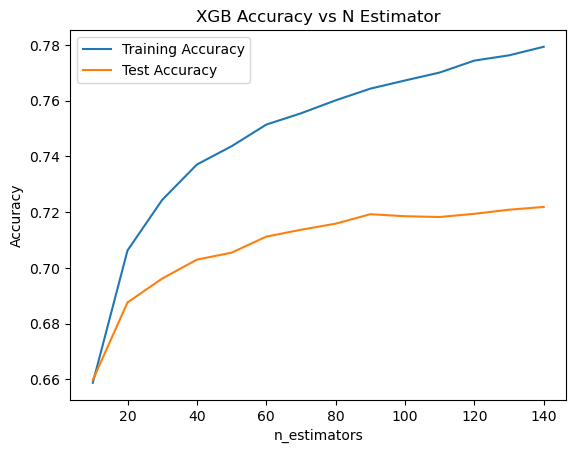

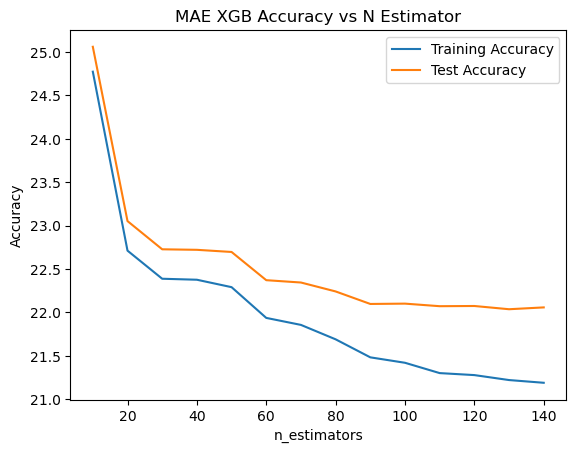

In [63]:
n_est = range(10,150,10)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in n_est:
    xgb = XGBRegressor(n_estimators=est, learning_rate=0.2, max_depth=2, subsample=1.0)
    xgb.fit(new_X_train, y_train)   
    train_acc.append(xgb.score(new_X_train, y_train))
    test_acc.append(xgb.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, xgb.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, xgb.predict(new_X_test)))


plt.plot(n_est, train_acc, label='Training Accuracy')
plt.plot(n_est, test_acc, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('XGB Accuracy vs N Estimator')
plt.legend()
plt.show()

plt.plot(n_est, mae_train, label='Training Accuracy')
plt.plot(n_est, mae_test, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('MAE XGB Accuracy vs N Estimator')
plt.legend()
plt.show()

We will set the n_estimator hyperparameter at 40.

### learning_rate

Let's take a look at `learning_rate`. We will set the learning_rate value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

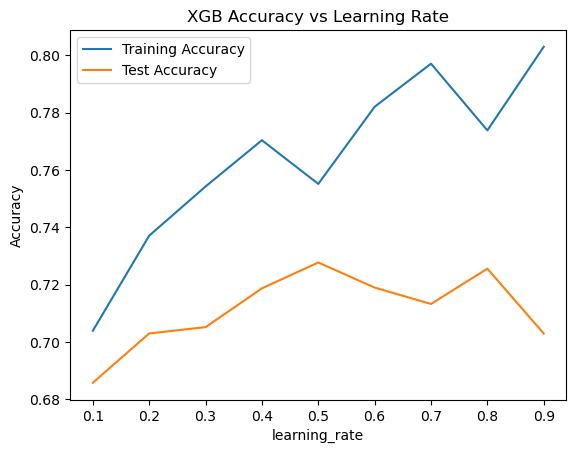

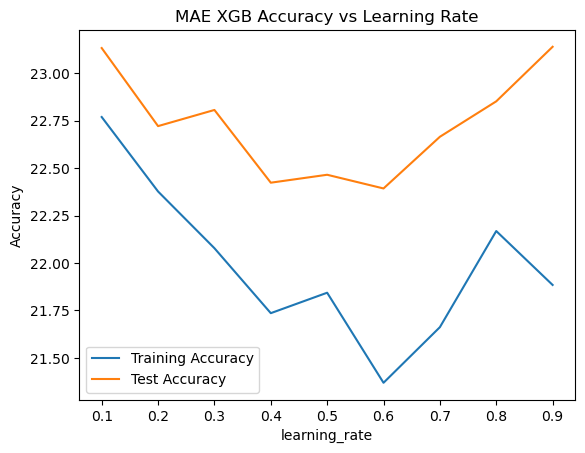

In [64]:
lr = np.arange(0.1,1.0,0.1)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in lr:
    xgb = XGBRegressor(n_estimators=40, learning_rate=est, max_depth=2, subsample=1.0)
    xgb.fit(new_X_train, y_train)   
    train_acc.append(xgb.score(new_X_train, y_train))
    test_acc.append(xgb.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, xgb.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, xgb.predict(new_X_test)))


plt.plot(lr, train_acc, label='Training Accuracy')
plt.plot(lr, test_acc, label='Test Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('XGB Accuracy vs Learning Rate')
plt.legend()
plt.show()

plt.plot(lr, mae_train, label='Training Accuracy')
plt.plot(lr, mae_test, label='Test Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('MAE XGB Accuracy vs Learning Rate')
plt.legend()
plt.show()

We will set the learning rate value at 0.5.

### subsample

Let's take a look at `subsample`. We will set the subsample value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

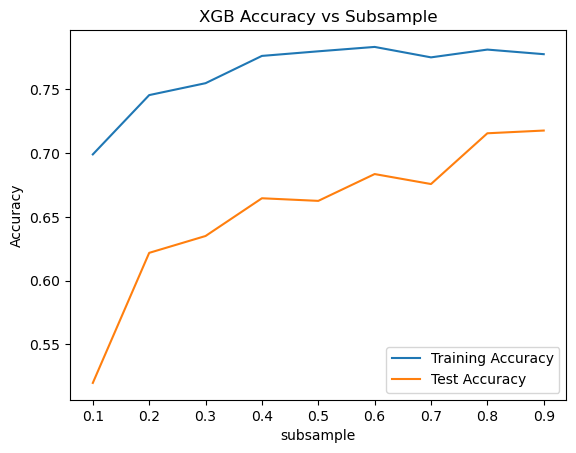

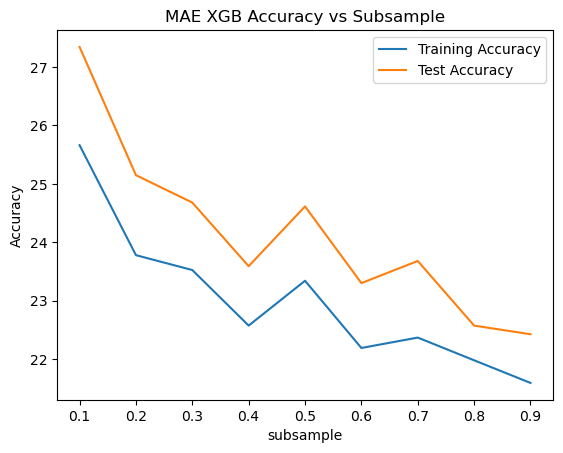

In [65]:
sub = np.arange(0.1,1.0,0.1)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in sub:
    xgb = XGBRegressor(n_estimators=40, learning_rate=0.5, max_depth=2, subsample=est)
    xgb.fit(new_X_train, y_train)   
    train_acc.append(xgb.score(new_X_train, y_train))
    test_acc.append(xgb.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, xgb.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, xgb.predict(new_X_test)))


plt.plot(sub, train_acc, label='Training Accuracy')
plt.plot(sub, test_acc, label='Test Accuracy')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.title('XGB Accuracy vs Subsample')
plt.legend()
plt.show()

plt.plot(sub, mae_train, label='Training Accuracy')
plt.plot(sub, mae_test, label='Test Accuracy')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.title('MAE XGB Accuracy vs Subsample')
plt.legend()
plt.show()

The subsample value of 0.9 displays the lowest discrepancy between the training and test sets for both R-squared and MAE.

### max_depth

Let's take a look at `max_depth`. We will set the max_depth value as unknown and set other hyperparameters according to the optimal set of values we have found from above.

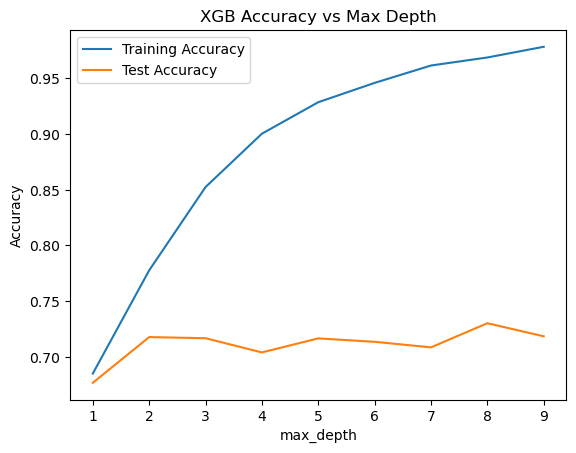

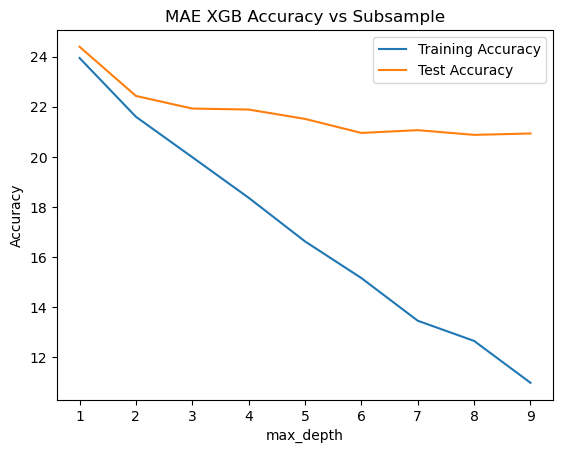

In [66]:
m_d = np.arange(1, 10, 1)
train_acc = []
test_acc = []
mae_train=[]
mae_test=[]

for est in m_d:
    xgb = XGBRegressor(n_estimators=40, learning_rate=0.5, max_depth=est, subsample=0.9)
    xgb.fit(new_X_train, y_train)   
    train_acc.append(xgb.score(new_X_train, y_train))
    test_acc.append(xgb.score(new_X_test, y_test))
    mae_train.append(mean_absolute_error(y_train, xgb.predict(new_X_train)))
    mae_test.append(mean_absolute_error(y_test, xgb.predict(new_X_test)))


plt.plot(m_d, train_acc, label='Training Accuracy')
plt.plot(m_d, test_acc, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('XGB Accuracy vs Max Depth')
plt.legend()
plt.show()

plt.plot(m_d, mae_train, label='Training Accuracy')
plt.plot(m_d, mae_test, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('MAE XGB Accuracy vs Subsample')
plt.legend()
plt.show()

We will set the max_depth at 2. Let's impute all the hyperparameter values found from tuning process, then observe the evaluation scores in R-squared and MAE.

In [67]:
xgb_model = XGBRegressor(n_estimators=40,learning_rate=0.5, max_depth=2, subsample=0.9)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7776921147327457
r2 test = 0.7177922334620414
mae train = 21.59387875508918
mae test = 22.426725459404786


This latest set of parameters is a huge improvement from the initial grid search model as the discrepancies between the train and test sets are minimal, thus the data is barely overfitting. Let's run a second grid search to see if we can find a better performing train and test sets to improve the performance of XGBoost model.

In [68]:
# Define the parameter grid
param_grid = {
    'n_estimators': [20, 60, 100],
    'max_depth': [2, 5, 8],
    'learning_rate': [0.2, 0.5, 0.8],
    'subsample': [0.2, 0.5, 0.8]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)

# Fit the model
grid_search.fit(new_X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(new_X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.2; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.2; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.2; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=20, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=60, subsample=0.2; total time=   1.7s
[CV] END learning_

[CV] END learning_rate=0.5, max_depth=2, n_estimators=20, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.2; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.2; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.2; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=60, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.2; total 

[CV] END learning_rate=0.8, max_depth=2, n_estimators=60, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=60, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.2; total time=   1.8s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.2; total time=   1.9s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.2; total time=   1.9s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.8, max_depth=2, n_estimators=100, subsample=0.8

In [69]:
xgb_model = XGBRegressor(n_estimators=20,learning_rate=0.2, max_depth=8, subsample=0.8)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.9308875244548929
r2 test = 0.710368964326539
mae train = 15.710851820115987
mae test = 20.544145477291384


Unfortunately, the best parameters provided by the second grid search performed worse than our imputed version prior to the second grid search modeling. Therefore, we will stick with the hyperparameters of: (n_estimators=40,learning_rate=0.2, max_depth=2, subsample=1.0), as this set was the best performing one out of all the hyperparameter sets.

In [70]:
xgb_model = XGBRegressor(n_estimators=40,learning_rate=0.2, max_depth=2, subsample=1.0)
xgb_model.fit(new_X_train, y_train)
y_train_pred_xgb = xgb_model.predict(new_X_train)
y_test_pred_xgb = xgb_model.predict(new_X_test)
print("r2 train =", r2_score(y_train, y_train_pred_xgb))
print("r2 test =", r2_score(y_test, y_test_pred_xgb))
print("mae train =", mean_absolute_error(y_train, y_train_pred_xgb))
print("mae test =", mean_absolute_error(y_test, y_test_pred_xgb))

r2 train = 0.7370576712602496
r2 test = 0.7029481505434604
mae train = 22.376573884024083
mae test = 22.721030193267282


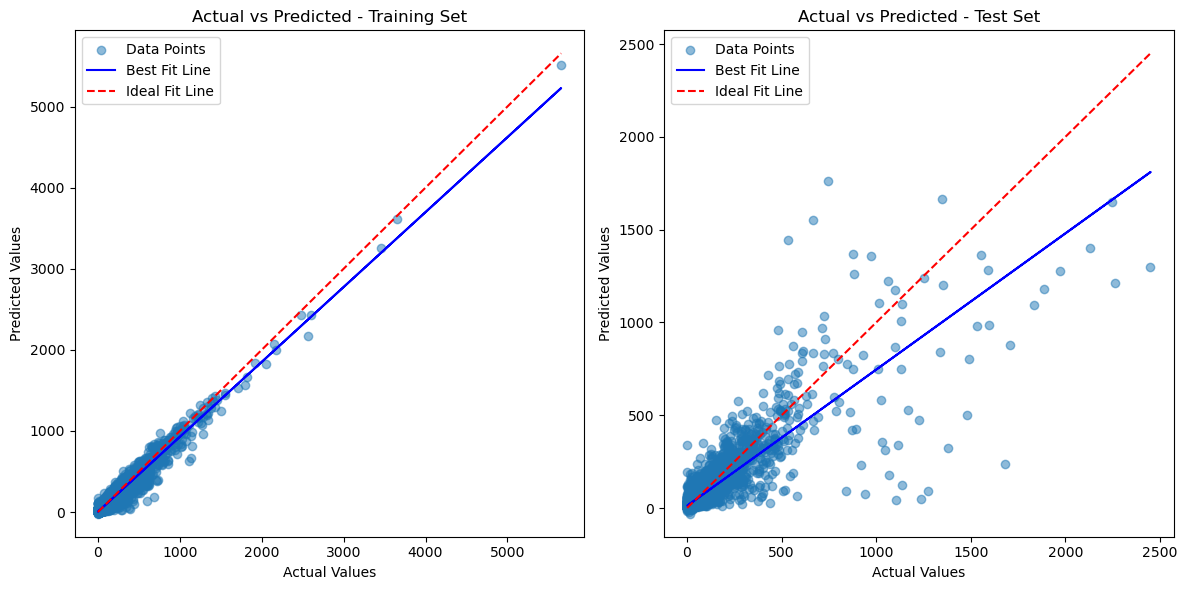

In [71]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_xgb, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train, y_pred_train_xgb, plt.gca(), 'Best Fit Line')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_xgb, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test, y_pred_test_xgb, plt.gca(), 'Best Fit Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

From the plots above, we can observe that the train set is performing pretty well as the best fit and ideal fit lines are close to each other and the datapoints lie on the ideal fit line. However, the test set shows that there is a significant difference between the ideal and best fit lines with data points diverging from the ideal fit line. Hence, further analysis is needed with more extensive grid search to boost the model's performance, which can be quite time consuming.

| Model                   | MAE (Train) | MAE (Test) | R-squared (Train) | R-squared (Test) |
|-------------------------|-------------|------------|-------------------|------------------|
| XGBoost Regressor       | 22.3766     | 22.7210    | 0.737058          | 0.702948         |

The R-squared value is fairly high with minimal discrepancy between the train and test set (there might be a slight overfit in the dataset). Moreover, the MAE values are relatively low compared to the overall range of our target variable, `views` which ranges from 1 to 5600. Now, let's compare Random Forest and XGBoost models and see which model performed better.

<a id = 'Eval'><a/>   
## Evaluation Metrics
    
---

| Model                   | MAE (Train) | MAE (Test) | R-squared (Train) | R-squared (Test) |
|-------------------------|-------------|------------|-------------------|------------------|
| Random Forest           | 21.3375     | 21.8572    | 0.731324          | 0.731279         |
| XGBoost Regressor       | 22.3766     | 22.7210    | 0.737058          | 0.702948         |

As we can see, the Random Forest Regressor performed slightly better than the XGBoost Regressor as the test R-squared value is higher (by 0.3 or 3 percent), and the MAE test value is lower by approximately 0.87. These differences are quite minor and both models are valid options to predict the number of views. However, we will opt with Random Forest as our best model to use for predicting number of views based on different job attributes on LinkedIn job posts.

### Limitations and Next Steps

**Limitations:**
- Both models were giving very similar results, quite unsure which model to use
- Lack of computing power to conduct some of the advanced modeling
- Missing information skewing the dataset

**Next Steps:**
- Conduct advanced text analysis, such as word embedding (and neural network) to boost the performance of text data
- More in-depth hyperparameter tuning and feature engineering to improve the MAE and R-squared values
- Precise feature selection can be implemented to reduce the number of features (errors)

<a id = 'Summary'><a/>   
## Summary
    
---

### Business Implications

**Business Objectives:** The main objective is to deliver precise forecasts for the number of views on LinkedIn job postings, thereby aiding both recruiters and job seekers in the job matching process.

**Business Impact:** The accuracy of our model influences the credibility of our view predictions. Reduced MAE values bolster the dependability of our platform, enhancing user confidence in their decision-making processes. Additionally, the R-squared value helps us gauge the model's effectiveness in explaining the variations observed in the data.

**Next Steps:** Further analysis will be conducted based on the identified limitations, including advanced text analysis like word embedding, in-depth hyperparameter tuning and feature engineering, and precise feature selection to reduce the MAE score and further enhance the predictive performance.